In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Пути к папке с изображениями
dataset_dir = 'DataSet'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')

# Создание папок для тренировочной и валидационной выборки
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Классы для разделения данных
classes = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8']

In [4]:
# Функция для разделения изображений на тренировочную и валидационную выборки
def split_data(class_name, validation_split=0.2):
    class_dir = os.path.join(dataset_dir, class_name)
    
    # Проверяем, существует ли директория класса
    if not os.path.exists(class_dir):
        print(f"Ошибка: директория {class_dir} не найдена.")
        return
    
    images = os.listdir(class_dir)
    
    if not images:  # Проверка на наличие изображений
        print(f"Ошибка: директория {class_dir} пуста.")
        return
    
    # Разделяем изображения
    train_images, val_images = train_test_split(images, test_size=validation_split, random_state=42)
    
    # Создание директорий для каждого класса в папках train и validation
    train_class_dir = os.path.join(train_dir, class_name)
    validation_class_dir = os.path.join(validation_dir, class_name)
    
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)
    
    # Копируем изображения в соответствующие папки
    for img in train_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(train_class_dir, img)
        shutil.copy(src_path, dest_path)
    
    for img in val_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(validation_class_dir, img)
        shutil.copy(src_path, dest_path)


# Разделяем изображения для каждого класса
for cls in classes:
    split_data(cls)


In [8]:
# Создание генераторов для загрузки данных
batch_size = 32
image_size = 128

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Проверка, что генераторы созданы успешно
print(f"Training samples: {train_generator.samples}, Validation samples: {validation_generator.samples}")

# # Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')  # Количество нейронов должно соответствовать числу классов
])

# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),  # Уменьшено до 16
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(32, (3, 3), activation='relu'),  # Уменьшено до 32
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(64, activation='relu'),  # Уменьшено до 64
#     Dense(len(classes), activation='softmax')  # Количество нейронов должно соответствовать числу классов
# ])
print(train_generator.samples // batch_size, validation_generator.samples // batch_size)
# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Found 25360 images belonging to 8 classes.
Found 7944 images belonging to 8 classes.
Training samples: 25360, Validation samples: 7944
792 248


C:\Users\dmitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Компиляция и обучение модели
history = model.fit(
    train_generator,
    #steps_per_epoch= 164,#train_generator.samples // batch_size,
    validation_data=validation_generator,
    #validation_steps= 41, #validation_generator.samples // batch_size,
    epochs = 5
)

# Сохранение модели
model.save('zernike_model.h5')

Epoch 1/5
793/793 ━━━━━━━━━━━━━━━━━━━━ 408s 513ms/step - accuracy: 0.4160 - loss: 0.2994 - val_accuracy: 0.8674 - val_loss: 0.0851
Epoch 2/5
793/793 ━━━━━━━━━━━━━━━━━━━━ 411s 519ms/step - accuracy: 0.8906 - loss: 0.0720 - val_accuracy: 0.9094 - val_loss: 0.0545
Epoch 3/5
793/793 ━━━━━━━━━━━━━━━━━━━━ 409s 516ms/step - accuracy: 0.9542 - loss: 0.0360 - val_accuracy: 0.9209 - val_loss: 0.0485
Epoch 4/5
793/793 ━━━━━━━━━━━━━━━━━━━━ 407s 514ms/step - accuracy: 0.9832 - loss: 0.0169 - val_accuracy: 0.9203 - val_loss: 0.0570
Epoch 5/5
793/793 ━━━━━━━━━━━━━━━━━━━━ 408s 514ms/step - accuracy: 0.9872 - loss: 0.0118 - val_accuracy: 0.9231 - val_loss: 0.0629


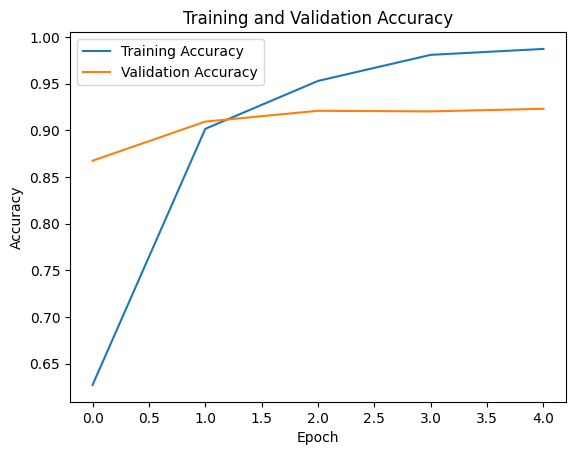

In [10]:

# Визуализация обучения
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
